# Install and Import Libraries

In [3]:
pip install -q pandas matplotlib scikit-learn seaborn numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# %matplotlib inline

# set figure size
plt.rcParams['figure.figsize'] = (6, 4)

# Download the Dataset

In [5]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df[4].value_counts()

4
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Choosing linearly separable classes 'Iris-setosa' and 'Iris-virginica'

In [7]:
df_filtered = df[df[4].isin(['Iris-setosa', 'Iris-virginica'])]

## Perceptron and AdalineGD class

In [8]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [9]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## Helper function for model training and plotting

In [10]:
def train(X, y, numFeatures, n_iter):
    input_X,output_Y  = X, y

    X_train, X_test, y_train, y_test = train_test_split(input_X, output_Y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    scaler.fit(input_X)
    X_train_standard = scaler.transform(X_train)
    X_test_standard = scaler.transform(X_test)


    model = Perceptron(eta=0.001 ,n_iter=n_iter)
    model.fit(X_train_standard,y_train)
    y_pred_perceptron = model.predict(X_test_standard)



    adaline = AdalineGD(eta=0.001 ,n_iter=n_iter)
    adaline.fit(X_train_standard,y_train)
    y_pred_adaline = adaline.predict(X_test_standard)

    # Calculate accuracy for perceptron and adaline
    accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
    accuracy_adaline = accuracy_score(y_test, y_pred_adaline)

    print(f"Accuracy for preceptron {numFeatures} features and 2 classes: {accuracy_perceptron*100:.2f}")
    print(f"Accuracy for adaline {numFeatures} features and 2 classes: {accuracy_adaline*100:.2f}")


In [11]:
def plot_perceptron(X, y, n_iter):
    ppn = Perceptron(eta=0.001, n_iter=n_iter)
    ppn.fit(X, y)
    plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of updates')
    plt.title('Perceptron Training: Number of Updates per Epoch')
    plt.show()

In [12]:
def plot_adaline(X, y, n_iter):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    adal = AdalineGD(n_iter=n_iter, eta=0.1).fit(X, y)
    ax[0].plot(range(1, len(adal.cost_) + 1), np.log10(adal.cost_), marker='o') 
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel ('log(Sum-squared-error) ')
    ax[0].set_title('Adaline - Learning rate 0.01')
    ada2 = AdalineGD(n_iter=n_iter, eta=0.0001).fit(X, y) 
    ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel ('Sum-squared-error')
    ax[1].set_title('Adaline - Learning rate 0.0001') 
    plt.show()

## Using two features

In [13]:
X = df_filtered[[0, 2]].values
y = df_filtered[4].values
y = np.where(y == 'Iris-setosa', -1, 1)

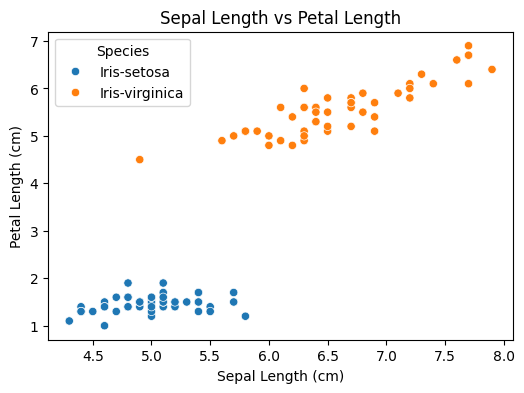

In [14]:
# Scatter plot of petal length and sepal length
sns.scatterplot(x=X[:, 0], y=X[:, 1], data=df_filtered, hue=df_filtered[4])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length')
plt.legend(title='Species')
plt.show()

In [15]:
train(X, y, 2, 10)

Accuracy for preceptron 2 features and 2 classes: 100.00
Accuracy for adaline 2 features and 2 classes: 100.00


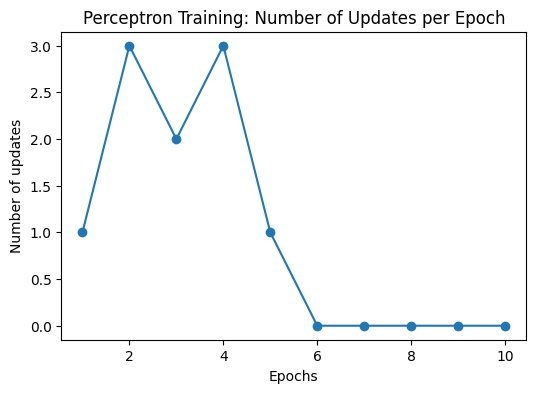

In [16]:
plot_perceptron(X, y, 10)

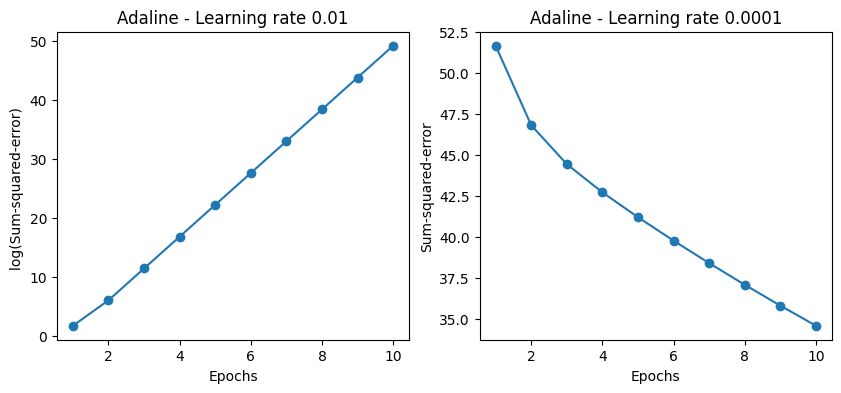

In [17]:
plot_adaline(X, y, 10)

## Using three features

In [18]:
X = df_filtered[[0, 1, 2]].values
y = df_filtered[4].values
y = np.where(y == 'Iris-setosa', -1, 1)

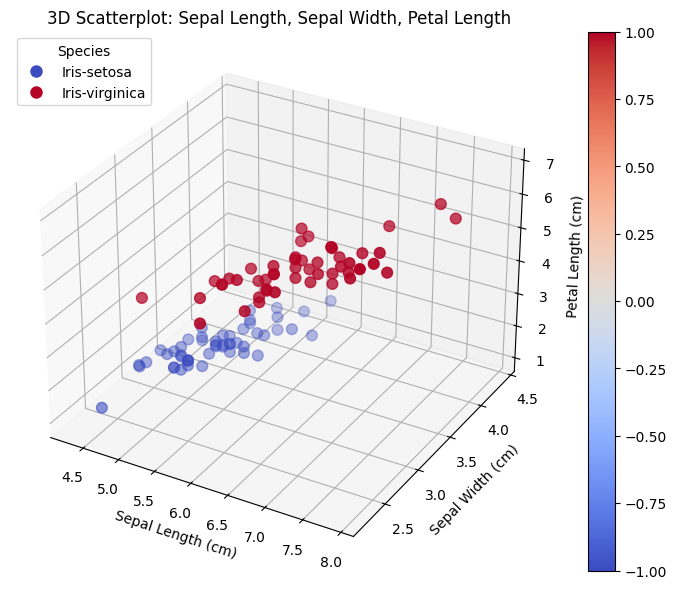

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', s=60)
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Scatterplot: Sepal Length, Sepal Width, Petal Length')

legend_labels = ['Iris-setosa', 'Iris-virginica']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                             markerfacecolor=plt.cm.coolwarm((val + 1) / 2), markersize=10)
                  for val, label in zip([-1, 1], legend_labels)]
ax.legend(handles=legend_handles, title='Species', loc='upper left', bbox_to_anchor=(0, 1))

plt.colorbar(scatter)
plt.show()

In [21]:
train(X, y, 3, 10)

Accuracy for preceptron 3 features and 2 classes: 100.00
Accuracy for adaline 3 features and 2 classes: 100.00


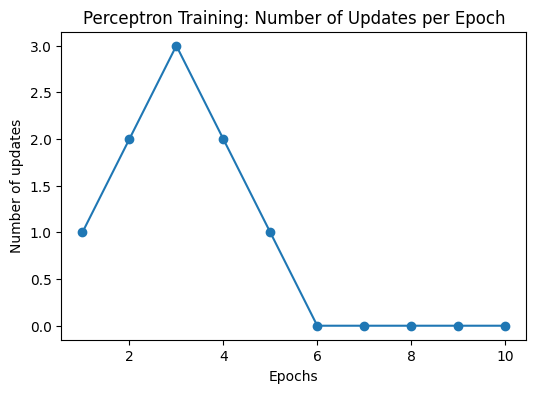

In [22]:
plot_perceptron(X, y, 10)

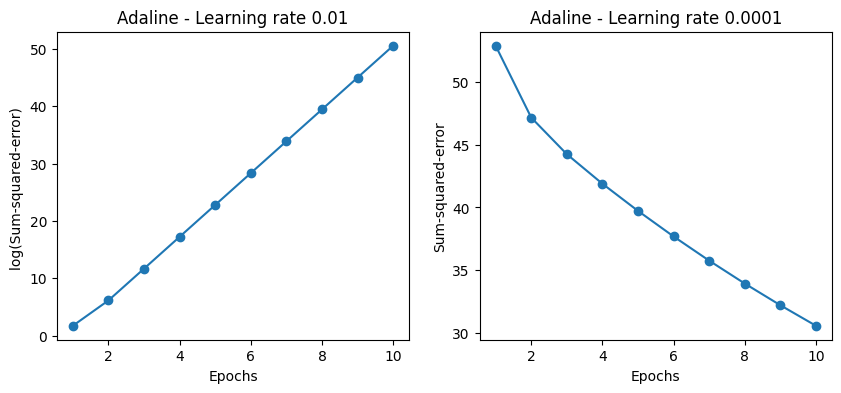

In [23]:
plot_adaline(X, y, 10)

## Using four features

In [24]:
X = df_filtered[[0, 1, 2, 3]].values
y = df_filtered[4].values
y = np.where(y == 'Iris-setosa', -1, 1)


<Figure size 1200x1000 with 0 Axes>

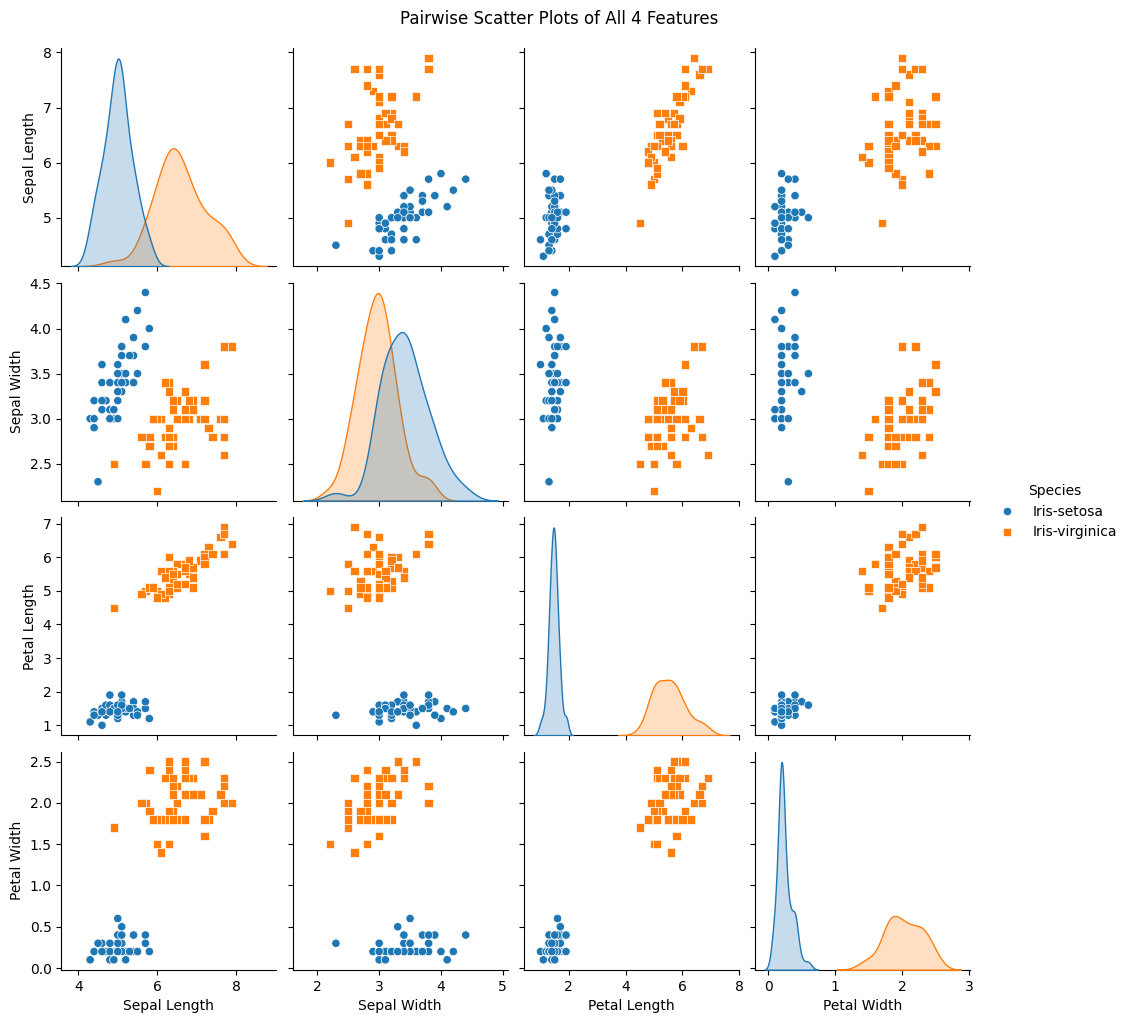

In [25]:
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
df_plot = pd.DataFrame(X, columns=feature_names)
df_plot['Species'] = ['Iris-setosa' if label == -1 else 'Iris-virginica' for label in y]

# Create pair plot
plt.figure(figsize=(12, 10))
sns.pairplot(df_plot, hue='Species', diag_kind='kde', markers=['o', 's'])
plt.suptitle('Pairwise Scatter Plots of All 4 Features', y=1.02)
plt.show()

In [26]:
train(X, y, 4, 10)

Accuracy for preceptron 4 features and 2 classes: 100.00
Accuracy for adaline 4 features and 2 classes: 100.00


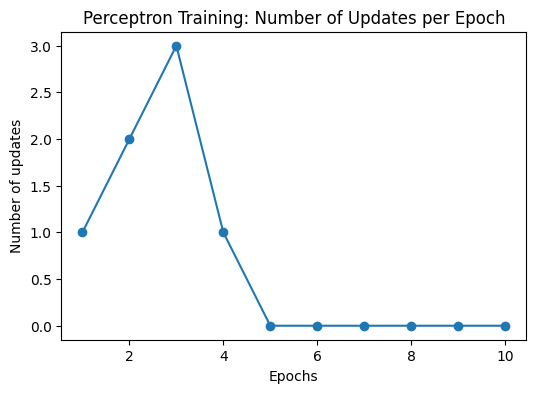

In [27]:
plot_perceptron(X, y, 10)

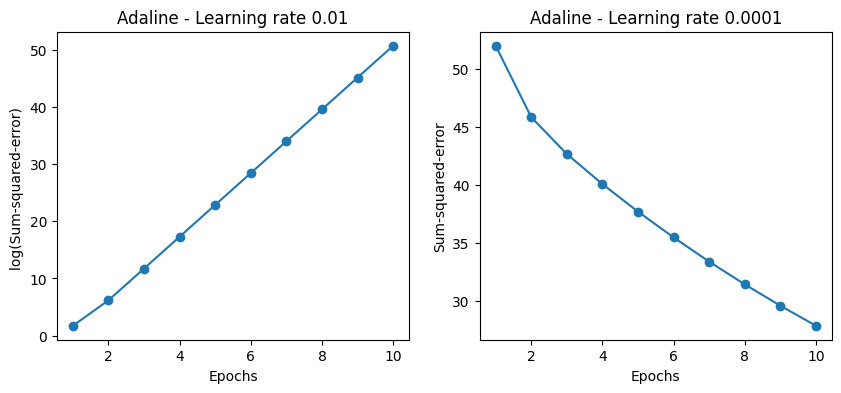

In [28]:
plot_adaline(X, y, 10)

# Choosing non-linearly separable classes 'Iris-virginica' and 'Iris-versicolor'

In [29]:
df_filtered = df[df[4].isin(['Iris-virginica', 'Iris-versicolor'])]

## Using two features

In [30]:
X = df_filtered[[0, 2]].values
y = df_filtered[4].values
y = np.where(y == 'Iris-virginica', -1, 1)

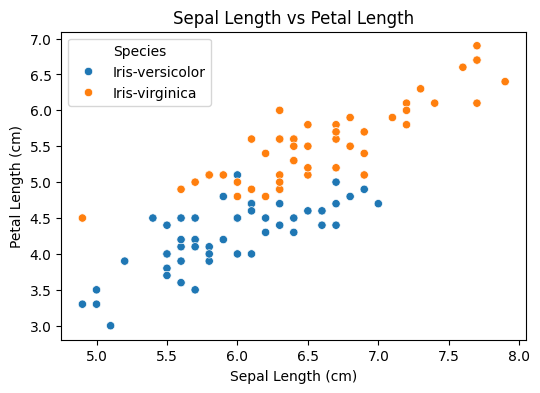

In [31]:
# Scatter plot of petal length and sepal length
sns.scatterplot(x=X[:, 0], y=X[:, 1], data=df_filtered, hue=df_filtered[4])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length')
plt.legend(title='Species')
plt.show()

In [32]:
train(X, y, 2, 100)

Accuracy for preceptron 2 features and 2 classes: 86.67
Accuracy for adaline 2 features and 2 classes: 86.67


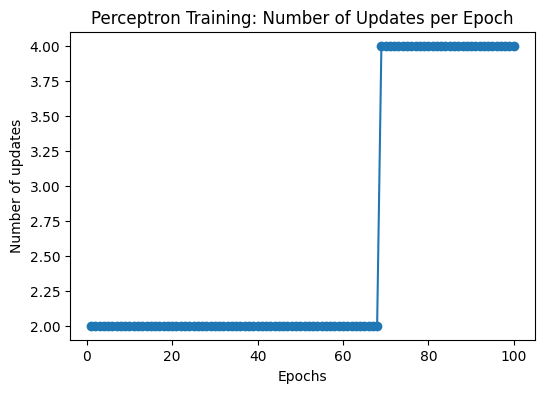

In [33]:
plot_perceptron(X, y, 100)

/Users/anshharjai/anaconda3/envs/ML/lib/python3.11/site-packages/numpy/_core/_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/var/folders/24/gqxyw4l53xn8fhx0gzym3qr00000gn/T/ipykernel_79387/2517886167.py:61: RuntimeWarning: overflow encountered in square
  cost = (errors**2).sum() / 2.0


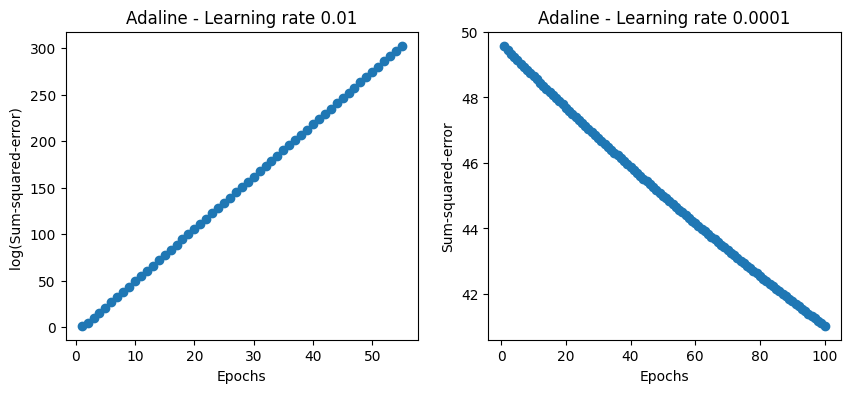

In [34]:
plot_adaline(X, y, 100)

## Using three features

In [35]:
X = df_filtered[[0, 1, 2]].values
y = df_filtered[4].values
y = np.where(y == 'Iris-virginica', -1, 1)

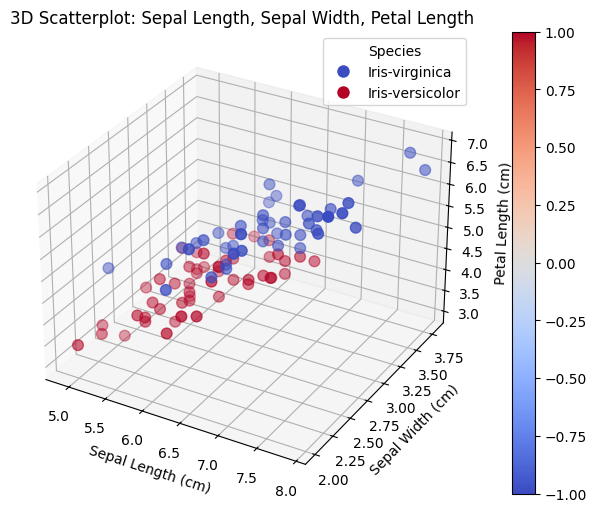

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', s=60)
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Scatterplot: Sepal Length, Sepal Width, Petal Length')

legend_labels = ['Iris-virginica', 'Iris-versicolor']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                             markerfacecolor=plt.cm.coolwarm((val + 1) / 2), markersize=10)
                  for val, label in zip([-1, 1], legend_labels)]
ax.legend(handles=legend_handles, title='Species')

plt.colorbar(scatter)
plt.show()

In [38]:
train(X, y, 3, 100)

Accuracy for preceptron 3 features and 2 classes: 86.67
Accuracy for adaline 3 features and 2 classes: 86.67


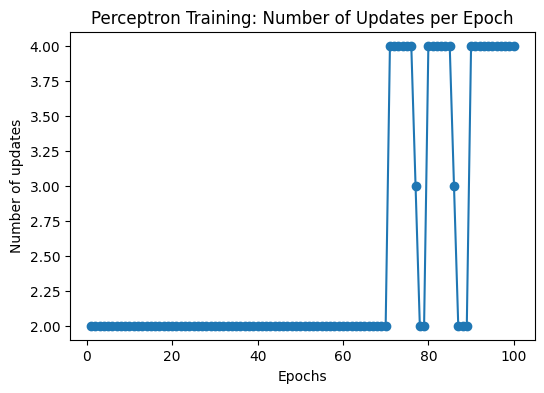

In [39]:
plot_perceptron(X, y, 100)

/var/folders/24/gqxyw4l53xn8fhx0gzym3qr00000gn/T/ipykernel_79387/2517886167.py:61: RuntimeWarning: overflow encountered in square
  cost = (errors**2).sum() / 2.0


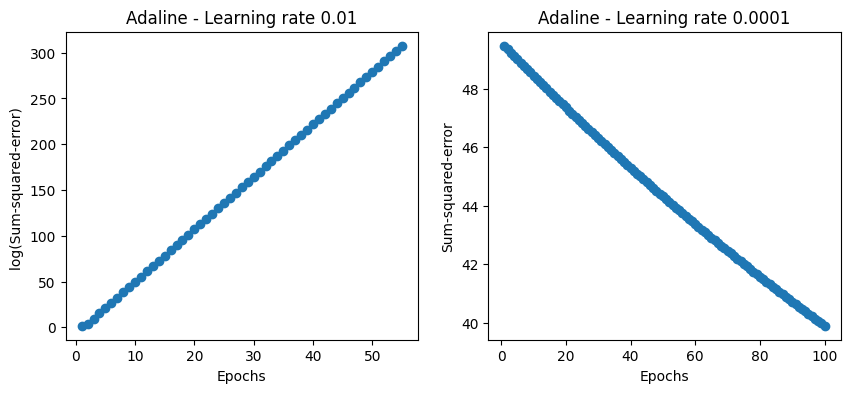

In [40]:
plot_adaline(X, y, 100)

## Using four features

In [41]:
X = df_filtered[[0, 1, 2, 3]].values
y = df_filtered[4].values
y = np.where(y == 'Iris-virginica', -1, 1)

<Figure size 1200x1000 with 0 Axes>

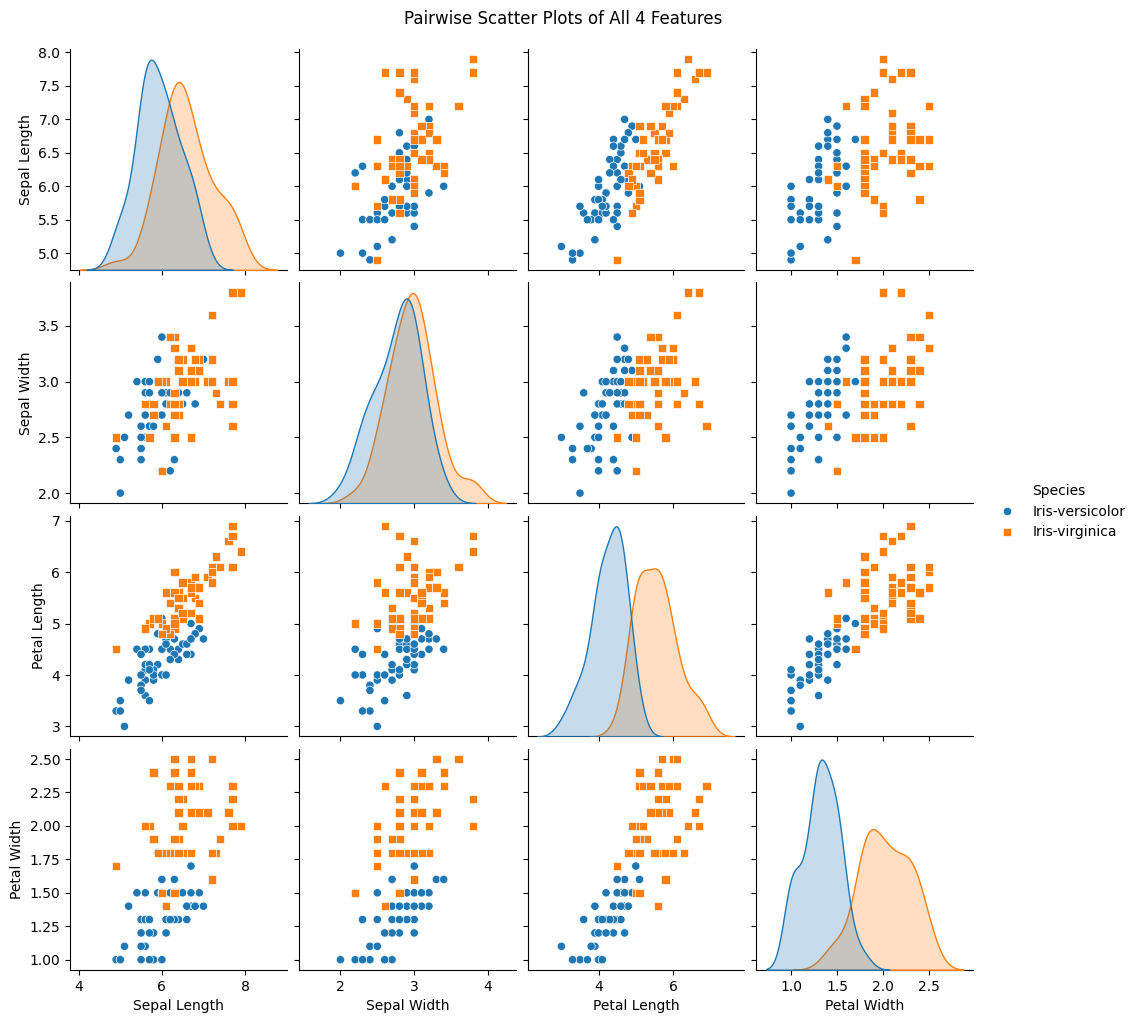

In [42]:
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
df_plot = pd.DataFrame(X, columns=feature_names)
df_plot['Species'] = ['Iris-virginica' if label == -1 else 'Iris-versicolor' for label in y]

# Create pair plot
plt.figure(figsize=(12, 10))
sns.pairplot(df_plot, hue='Species', diag_kind='kde', markers=['o', 's'])
plt.suptitle('Pairwise Scatter Plots of All 4 Features', y=1.02)
plt.show()

In [43]:
train(X, y, 4, 100)

Accuracy for preceptron 4 features and 2 classes: 83.33
Accuracy for adaline 4 features and 2 classes: 86.67


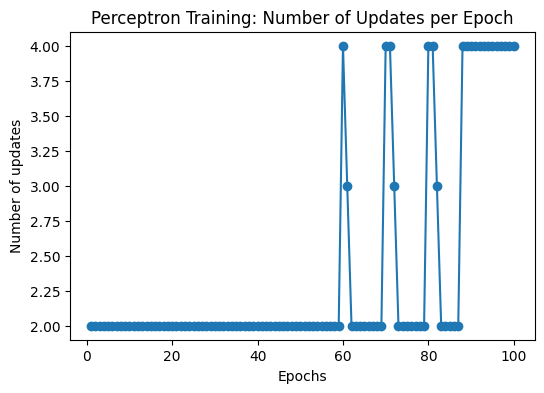

In [44]:
plot_perceptron(X, y, 100)

/Users/anshharjai/anaconda3/envs/ML/lib/python3.11/site-packages/numpy/_core/_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/var/folders/24/gqxyw4l53xn8fhx0gzym3qr00000gn/T/ipykernel_79387/2517886167.py:61: RuntimeWarning: overflow encountered in square
  cost = (errors**2).sum() / 2.0


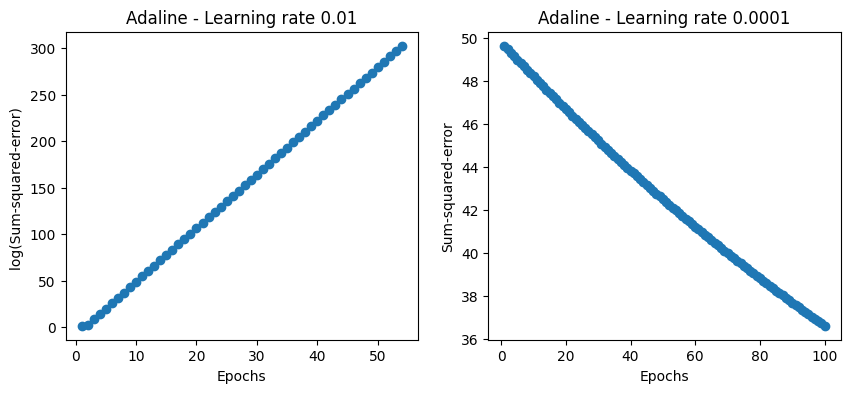

In [45]:
plot_adaline(X, y, 100)

# Conclusion

When we tested Perceptron and Adaline on the Iris dataset, we saw that both work really well on linearly separable classes like Setosa and Versicolor, reaching 100% accuracy. The Perceptron quickly finds a perfect separating line by updating weights only when it makes mistakes, while Adaline uses gradient descent to minimize error, which makes it more sensitive to the learning rate and number of iterations. With the right settings, both can perfectly separate the classes.

On the other hand, for non-linearly separable classes like Versicolor and Virginica, the accuracy drops to around 83–84% for Perceptron and 86–87% for Adaline. Adaline does slightly better because it smooths out weight updates instead of just reacting to errors, but neither can perfectly separate the groups because the data isn’t split in a straight line.

In short, both algorithms work well when the data is linearly separable, but they struggle with non-linear cases. 